In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df_train = pd.read_csv('/content/summarized data.xlsx - 工作表2.csv')
df_train['House_Price_Index'].describe()

count    217.000000
mean     163.134150
std       23.371929
min      101.211094
25%      151.294351
50%      161.672798
75%      179.123437
max      212.737331
Name: House_Price_Index, dtype: float64

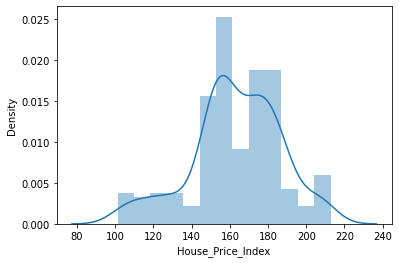

In [14]:
sns.distplot(df_train['House_Price_Index'])

In [15]:
#skewness and kurtosis
print("Skewness: %f" % df_train['House_Price_Index'].skew())
print("Kurtosis: %f" % df_train['House_Price_Index'].kurt())

Skewness: -0.428309
Kurtosis: 0.245431


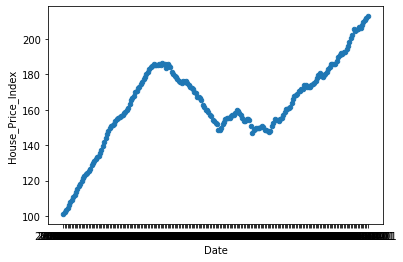

In [16]:
var = 'Date'
data = pd.concat([df_train['House_Price_Index'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='House_Price_Index')

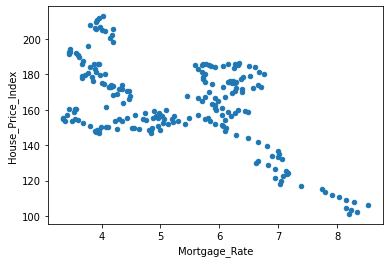

In [17]:
#scatter plot house_price_index/mortgage-rate
var = 'Mortgage_Rate'
data = pd.concat([df_train['House_Price_Index'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='House_Price_Index');

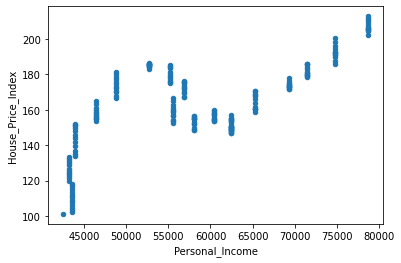

In [18]:
var = 'Personal_Income'
data = pd.concat([df_train['House_Price_Index'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='House_Price_Index');

looking at the graph, this is very similar to the trend of house prices over time. this suggests some kind of correlation I believe between house prices and personal income, so it might not be the best variable to include I think...?

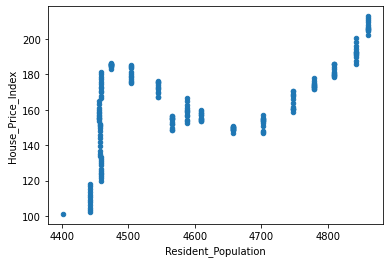

In [19]:
var = 'Resident_Population'
data = pd.concat([df_train['House_Price_Index'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='House_Price_Index');

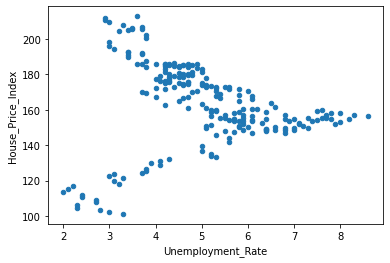

In [20]:
var = 'Unemployment_Rate'
data = pd.concat([df_train['House_Price_Index'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='House_Price_Index');

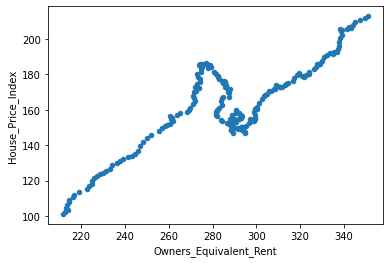

In [21]:
var = 'Owners_Equivalent_Rent'
data = pd.concat([df_train['House_Price_Index'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='House_Price_Index');

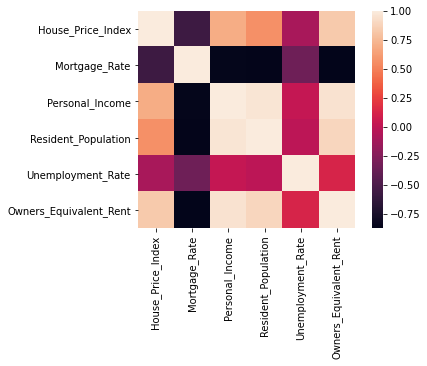

In [22]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=1, square=True);

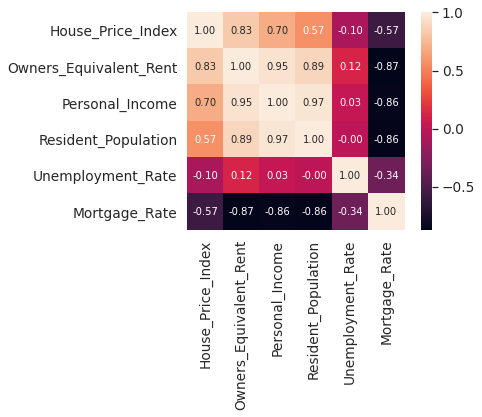

In [23]:
#saleprice correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'House_Price_Index')['House_Price_Index'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

looks like owners eq rent, personal income, and resident population are all highly correlated with mortgage rate. this means that it's probably not the best to include all three of these variables or any of them at all in the model?

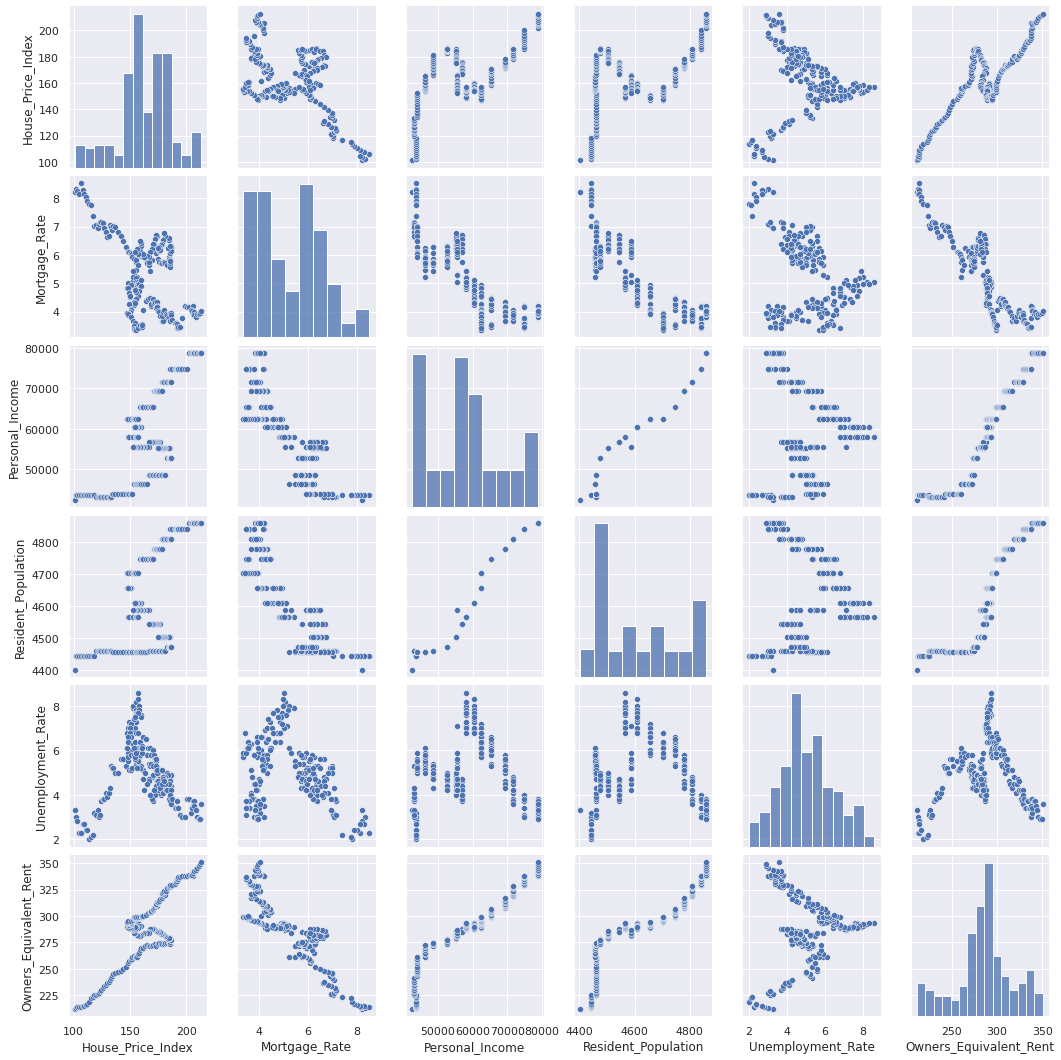

In [24]:
#scatterplot
sns.set()
cols = ['House_Price_Index', 'Mortgage_Rate', 'Personal_Income', 'Resident_Population', 'Unemployment_Rate', 'Owners_Equivalent_Rent', 'Date']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [25]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['House_Price_Index'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.65558867]
 [-2.60986374]
 [-2.56154565]
 [-2.50412806]
 [-2.43486658]
 [-2.36753474]
 [-2.311132  ]
 [-2.25597025]
 [-2.19584032]
 [-2.13221408]]

outer range (high) of the distribution:
[[1.78935742]
 [1.81134983]
 [1.82496098]
 [1.84893772]
 [1.8627855 ]
 [1.92733741]
 [1.99100612]
 [2.03955035]
 [2.08566258]
 [2.12724718]]


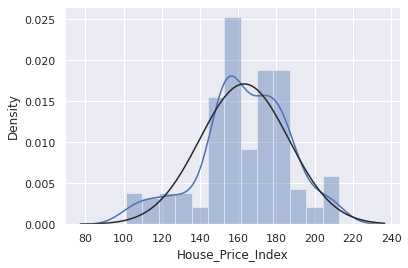

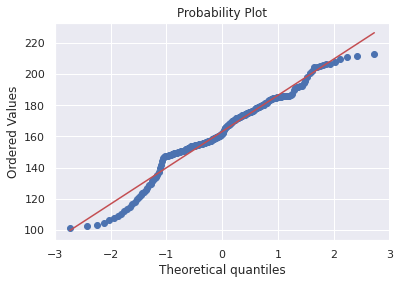

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['House_Price_Index'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['House_Price_Index'], plot=plt)

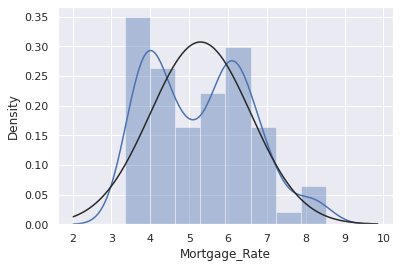

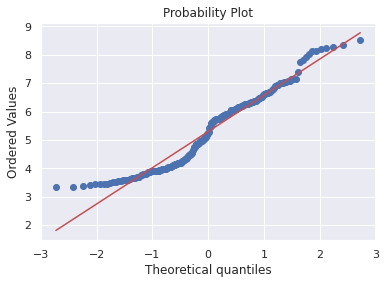

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['Mortgage_Rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Mortgage_Rate'], plot=plt)

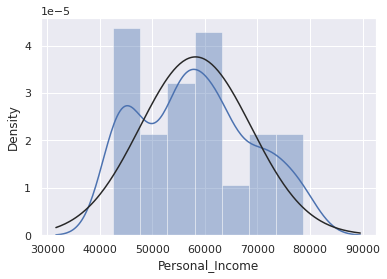

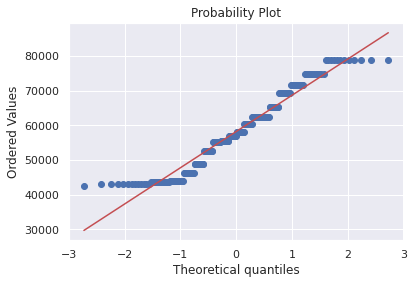

In [28]:
#histogram and normal probability plot
sns.distplot(df_train['Personal_Income'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Personal_Income'], plot=plt)

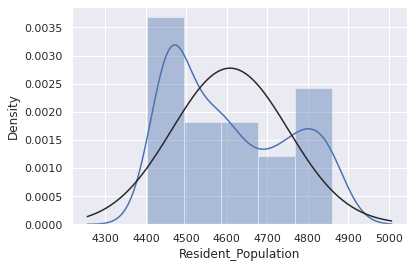

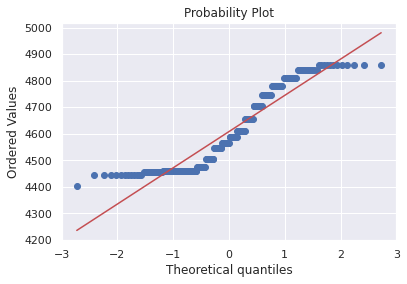

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['Resident_Population'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Resident_Population'], plot=plt)

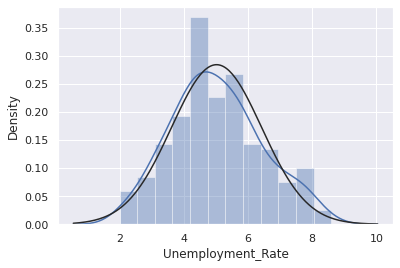

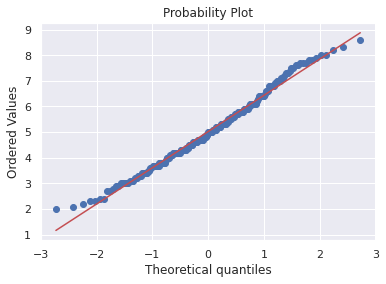

In [30]:
#histogram and normal probability plot
sns.distplot(df_train['Unemployment_Rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Unemployment_Rate'], plot=plt)

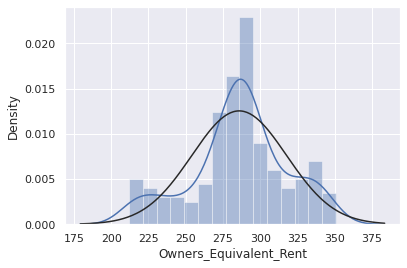

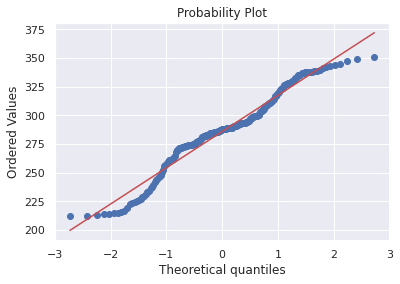

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['Owners_Equivalent_Rent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Owners_Equivalent_Rent'], plot=plt)